# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install holidays
import holidays
from holidays import country_holidays
import os
import glob

# Prepare data for questions

In [3]:
#glob all data together
f = "Data/Chicago-Crime*.csv"
crime_data = sorted(glob.glob(f))
crime_data

['Data\\Chicago-Crime_2001.csv',
 'Data\\Chicago-Crime_2002.csv',
 'Data\\Chicago-Crime_2003.csv',
 'Data\\Chicago-Crime_2004.csv',
 'Data\\Chicago-Crime_2005.csv',
 'Data\\Chicago-Crime_2006.csv',
 'Data\\Chicago-Crime_2007.csv',
 'Data\\Chicago-Crime_2008.csv',
 'Data\\Chicago-Crime_2009.csv',
 'Data\\Chicago-Crime_2010.csv',
 'Data\\Chicago-Crime_2011.csv',
 'Data\\Chicago-Crime_2012.csv',
 'Data\\Chicago-Crime_2013.csv',
 'Data\\Chicago-Crime_2014.csv',
 'Data\\Chicago-Crime_2015.csv',
 'Data\\Chicago-Crime_2016.csv',
 'Data\\Chicago-Crime_2017.csv',
 'Data\\Chicago-Crime_2018.csv',
 'Data\\Chicago-Crime_2019.csv',
 'Data\\Chicago-Crime_2020.csv',
 'Data\\Chicago-Crime_2021.csv',
 'Data\\Chicago-Crime_2022.csv']

In [4]:
#create main df
df = pd.concat([pd.read_csv(f, lineterminator='\n') for f in crime_data])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...,...
238853,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
238854,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
238855,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098
238856,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657


In [7]:
#change datatype of date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'].isna().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 662.0+ MB


In [9]:
#make datetime the index
df = df.set_index('Date')
df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 00:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098


In [13]:
#make a copy
df_counts = df.copy()
df_counts

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 00:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098


In [14]:
#resample the copy so that each row is one day
df_counts = df_counts.resample("D").sum()
df_counts

C:\Users\17175\AppData\Local\Temp\ipykernel_19076\2444150656.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_counts = df_counts.resample("D").sum()


,ID,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,
2001-01-01,4011740634,400,378,2267987,21147.0,8194.0,72641.077994,-152199.715024
2001-01-02,1545846568,383,187,1404493,12797.0,147.0,47664.670569,-99856.853277
2001-01-03,1542074517,343,197,1462886,13359.0,132.0,48045.805839,-100651.350927
2001-01-04,1555657957,377,179,1397040,12994.0,0.0,48785.523718,-102222.916683
2001-01-05,1701884634,415,200,1530155,14044.0,156.0,52769.463977,-110554.590960
...,...,...,...,...,...,...,...,...
2022-12-27,7543189950,70,96,694723,6812.0,14192.0,21427.078656,-44887.568351
2022-12-28,7983384637,63,112,697152,6830.0,14030.0,22592.581721,-47339.899182
2022-12-29,8358666625,66,107,718511,7037.0,14292.0,23639.979313,-49528.016672


# Stakeholder Questions:

## Topic 1) Compare Months

### What months had the most crimes? which had the least?

In [21]:
#extract the months
df['Month'] = df.index.month
df['MonthName'] = df.index.month_name()
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Month,MonthName
Date,,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,1,January
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,1,January
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,1,January
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,1,January
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,1,January


In [22]:
#saveing lookup for number vs name of month
unique_months = df.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup = dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

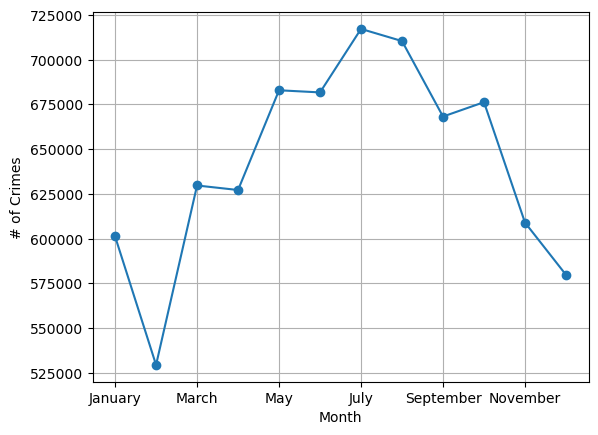

In [23]:
#save month counts 
month_counts = df['MonthName'].value_counts()[month_lookup.values()]
#make plot
ax = month_counts.plot(style='o-', grid=True, ylabel='# of Crimes', xlabel='Month');

#### It looks like the winter months, November-February had the least amount of crimes and the summer months, May-August had the most amount of crimes

### Are there any individual crimes that do not follow this pattern? if so, which crimes?

In [29]:
#save value count of individual counts by month
crimes_by_month = df.groupby("Primary Type").resample('M').sum()['Arrest'].reset_index()
crimes_by_month

C:\Users\17175\AppData\Local\Temp\ipykernel_19076\3558054767.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crimes_by_month = df.groupby("Primary Type").resample('M').sum()['Arrest'].reset_index()
C:\Users\17175\AppData\Local\Temp\ipykernel_19076\3558054767.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crimes_by_month = df.groupby("Primary Type").resample('M').sum()['Arrest'].reset_index()
C:\Users\17175\AppData\Local\Temp\ipykernel_19076\3558054767.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. 

,Primary Type,Date,Arrest
0,ARSON,2001-01-31,14
1,ARSON,2001-02-28,7
2,ARSON,2001-03-31,17
3,ARSON,2001-04-30,28
4,ARSON,2001-05-31,19
...,...,...,...
8597,WEAPONS VIOLATION,2022-08-31,492
8598,WEAPONS VIOLATION,2022-09-30,490
8599,WEAPONS VIOLATION,2022-10-31,416
8600,WEAPONS VIOLATION,2022-11-30,317


In [30]:
#pivot to have the crime as the column
crime_column = crimes_by_month.pivot(index='Date',columns='Primary Type')
crime_column

Arrest                           \
Primary Type  ARSON ASSAULT BATTERY BURGLARY   
Date                                           
2001-01-31     14.0   515.0  1499.0    117.0   
2001-02-28      7.0   501.0  1433.0    107.0   
2001-03-31     17.0   631.0  1660.0    130.0   
2001-04-30     28.0   639.0  1845.0    129.0   
2001-05-31     19.0   638.0  1921.0    112.0   
...             ...     ...     ...      ...   
2022-08-31      1.0   208.0   536.0     39.0   
2022-09-30      2.0   187.0   496.0     53.0   
2022-10-31      4.0   158.0   479.0     25.0   
2022-11-30      1.0   144.0   460.0     18.0   
2022-12-31      7.0   149.0   471.0     27.0   

                                                                    \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Date                                                                 
2001-01-31                                 NaN                40.0   
2001-02-28                                 NaN                36.0   
2001-03-31                                 NaN                29.0   
2001-04-30                                 NaN                35.0   
2001-05-31                                 1.0                29.0   
...                                        ...                 ...   
2022-08-31                                14.0                 NaN   
2022-09-30                                13.0                 NaN   
2022-10-31                                10.0                 NaN   
2022-11-30                                17.0                 NaN   
2022-12-31                                11.0                 NaN   

                                                                        \
Primary Type CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Date                                                                     
2001-01-31             337.0                     1.0            1014.0   
2001-02-28             333.0                     0.0             838.0   
2001-03-31             372.0                     2.0             877.0   
2001-04-30             448.0                     1.0             894.0   
2001-05-31             390.0                     0.0             830.0   
...                      ...                     ...               ...   
2022-08-31              86.0                     7.0              96.0   
2022-09-30              74.0                     4.0              95.0   
2022-10-31              79.0                     7.0              89.0   
2022-11-30              50.0                     2.0              88.0   
2022-12-31              83.0                     1.0             112.0   

                                 ...                             \
Primary Type DECEPTIVE PRACTICE  ... OTHER OFFENSE PROSTITUTION   
Date                             ...                              
2001-01-31                467.0  ...         361.0        563.0   
2001-02-28                410.0  ...         384.0        425.0   
2001-03-31                471.0  ...         439.0        550.0   
2001-04-30                405.0  ...         402.0        564.0   
2001-05-31                455.0  ...         515.0        503.0   
...                         ...  ...           ...          ...   
2022-08-31                 23.0  ...         178.0         23.0   
2022-09-30                 26.0  ...         187.0         57.0   
2022-10-31                 21.0  ...         163.0         26.0   
2022-11-30                 17.0  ...         141.0         14.0   
2022-12-31                 24.0  ...         142.0          6.0   

                                                                        \
Primary Type PUBLIC INDECENCY PUBLIC PEACE VIOLATION RITUALISM ROBBERY   
Date                                                                     
2001-01-31                NaN                   45.0       0.0   197.0   
2001-02-28                1.0                   53.0       0.0   139.0   
2001-03-31   

In [31]:
#drop column level
crime_column.columns = crime_column.columns.droplevel(0)
crime_column.columns

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE',
       'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION',
       'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT',
       'NARCOTICS', 'NON - CRIMINAL', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object', name='Primary Type')

<Axes: xlabel='Date'>

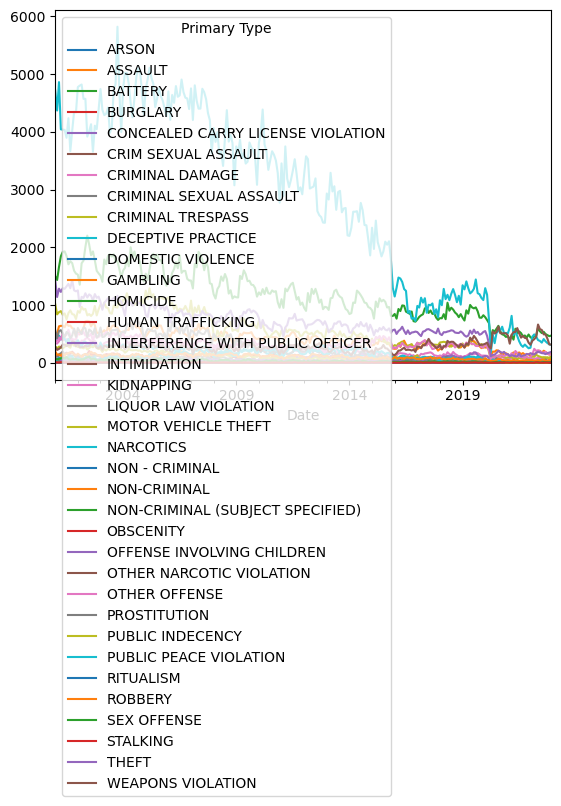

In [32]:
#plot 
crime_column.plot()

## Topic 2) Crimes Across The Years

### Is the total number of crimes increasing or decreasing across the years?

### Are there any individual crimes that are doing the opposite? (e.g. decreasing when overall crime is increasing or vice-versa?

## Topic 3) Comparing Holidays

### What are the top 3 holidays with the largest number of crimes?

### For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holiday?